In [16]:
import matplotlib.pyplot as plt
import numpy as np

In [20]:
import json

In [145]:
def load_json(file_path):
    return json.load(open(file_path, 'r'))

In [55]:
dev_simulated_a1 = json.load(open("./ann1/dev_simulated.json", "r"))
dev_simulated_a2 = json.load(open("./ann2/dev_simulated.json", "r"))

In [146]:
train_simulated_a1 = load_json("./ann1/train_simulated.json")
train_simulated_a2 = load_json("./ann2/train_simulated.json")

In [147]:
test_simulated_a1 = load_json("./ann1/test_simulated.json")
test_simulated_a2 = load_json("./ann2/test_simulated.json")

In [150]:
arg_names = ["roleset_id", "arg0", "arg1", "argL", "argT"]


def get_cor_incor(split_simu):
    correct = [0 for _ in arg_names]
    incorrects = [0 for _ in arg_names]

    for task in split_simu:
        for i, arg in enumerate(arg_names):
            if arg in task["predicted"] and task[arg] == task["predicted"][arg]:
                correct[i]+=1
            else:
                incorrects[i]+=1
    
    total = correct[-1] + incorrects[-1]
    correct = np.array(correct)/total
    incorrects = np.array(incorrects)/total
    return correct, incorrects

cor_a1, incor_a1 = get_cor_incor(dev_simulated_a1)

In [151]:
all_anns = [get_cor_incor(train_simulated_a1), get_cor_incor(train_simulated_a2), 
            get_cor_incor(dev_simulated_a1), get_cor_incor(dev_simulated_a2),
           get_cor_incor(test_simulated_a1), get_cor_incor(test_simulated_a2)]

In [179]:
# Sample data
categories = ['RS ID', 'ARG-0', 'ARG-1', 'ARG-LOC', 'ARG-TIME']
plt.rcParams['text.usetex'] = False
plt.rcParams["font.family"] = "Arial"


# Choose color palettes for each set of values
colors1 = ['yellowgreen']
colors2 = ['salmon']

# Create a bar chart with two sets of values
bar_width = 0.7  # Width of each bar
index = np.arange(len(categories))  # X-axis positions for the bars

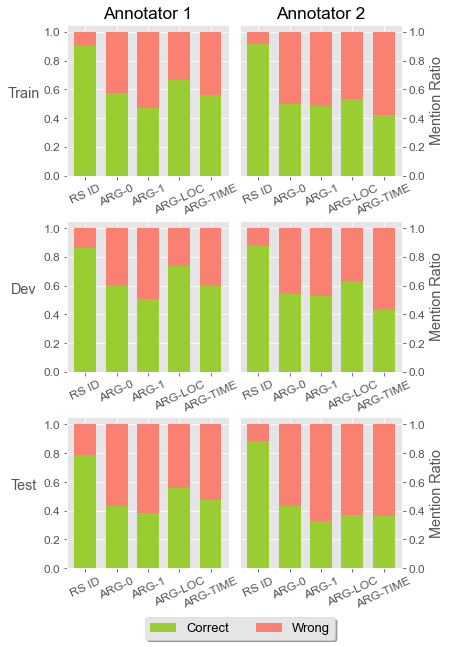

In [189]:
##### plt.figure(figsize=(20, 4))  # Set the figure size
plt.rcParams.update({'font.size': 12})
fig, (axes) = plt.subplots(3, 2, figsize=(6,10))

axes = [axes[i, j] for i in range(3) for j in range(2)]

for i, (correct, incorrects) in enumerate(all_anns):
    axes[i].bar(index, correct, bar_width, color=colors1, label='Correct')
    axes[i].bar(index, incorrects, bar_width, color=colors2, label='Wrong', bottom=correct)

    # Add labels and title
#     axes[i].set_xlabel('Arguments')
    axes[i].set_ylabel('Mention Ratio')
#     axes[i].set_title(f'A{i+1}')
    axes[i].set_xticks(index, categories, rotation=25)
# Add a legend

# axes[0].set_ylabel("")
axes[1].yaxis.tick_right()
axes[3].yaxis.tick_right()
axes[5].yaxis.tick_right()
# yticks = axes[0].get_yticks()
# axes[1].sharey(axes[1])
# axes[1].set_yticks(yticks)
# axes[0].set_yticklabels([])
axes[0].set_ylabel("Train", rotation=0, labelpad=20)
axes[2].set_ylabel("Dev", rotation=0, labelpad=20)
axes[4].set_ylabel("Test", rotation=0, labelpad=20)

axes[1].yaxis.set_label_position("right")
axes[3].yaxis.set_label_position("right")
axes[5].yaxis.set_label_position("right")

axes[0].set_title("Annotator 1")
axes[1].set_title("Annotator 2")

lgd = axes[-1].legend(loc='center', bbox_to_anchor=(0, -0.4),
          fancybox=True, shadow=True, ncol=2, fontsize=13)

plt.subplots_adjust(wspace=0.07, hspace=0.3)
# Customize the style (optional)
plt.style.use('ggplot')

# Adjust the X-axis labels
# plt.xticks(index, categories, rotation=15)

# Show the plot
# plt.show()
plt.savefig("dev_args_ratio.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')